In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
target_size = (200, 200)
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Multi_Label_dataset/train.csv')
data = data.head(2300)

In [ ]:
Data_columns = data.columns
Data_columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/'+
                         data['Id'][i]+
                         '.jpg',
                         target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 2300/2300 [11:13<00:00,  3.42it/s]


In [ ]:
y = np.array(data.drop(['Id', 'Genre'],axis=1))
y.shape

(2300, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=target_size+(3,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=50)

Epoch 1/10
42/42 [==============================] - 144s 3s/step - loss: 0.2591 - accuracy: 0.2850 - val_loss: 0.2329 - val_accuracy: 0.3522
Epoch 2/10
42/42 [==============================] - 144s 3s/step - loss: 0.2292 - accuracy: 0.3469 - val_loss: 0.2327 - val_accuracy: 0.3087
Epoch 3/10
42/42 [==============================] - 141s 3s/step - loss: 0.2211 - accuracy: 0.3628 - val_loss: 0.2348 - val_accuracy: 0.3565
Epoch 4/10
42/42 [==============================] - 154s 4s/step - loss: 0.2023 - accuracy: 0.3884 - val_loss: 0.2516 - val_accuracy: 0.3000
Epoch 5/10
42/42 [==============================] - 144s 3s/step - loss: 0.1664 - accuracy: 0.4101 - val_loss: 0.2891 - val_accuracy: 0.3087
Epoch 6/10
42/42 [==============================] - 150s 4s/step - loss: 0.1161 - accuracy: 0.4444 - val_loss: 0.3613 - val_accuracy: 0.2435
Epoch 7/10
42/42 [==============================] - 144s 3s/step - loss: 0.0676 - accuracy: 0.4536 - val_loss: 0.4782 - val_accuracy: 0.1870
Epoch 8/10
42

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)       

1/1 [==============================] - 0s 215ms/step
Drama
Comedy
Romance
Crime
Action


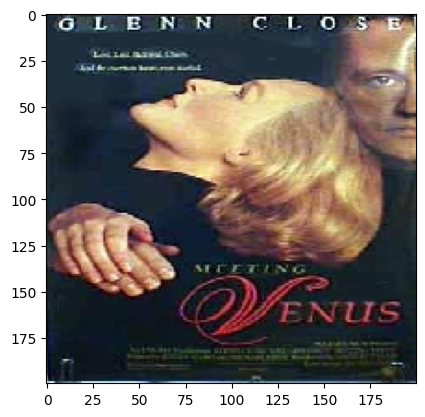

In [ ]:
img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/tt0102428.jpg',
                     target_size=(200,200,3))  # Change target size to (200,200,3)
plt.imshow(img)

img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,200,200,3)

classes = data.columns[2:]
y_pred = model.predict(img)

genre =np.argsort(y_pred[0])[:-6:-1]
for i in range(5):
    print(classes[genre[i]])



In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
